# Formula

## 概述

Formula 首先在分词功能中（SIF/segment ==> SIF/tokenization）中对原始文本的公式做切分处理，之后在 Formula/ast 中提供 [公式解析树] 功能，可以将数学公式的抽象语法分析树用文本或图片的形式表示出来。  

本模块另提供公式变量标准化的功能，如判断几个子公式内的‘x’为同一变量。

In [1]:
import matplotlib.pyplot as plt
from EduNLP.Formula import Formula
from EduNLP.Formula import FormulaGroup
from EduNLP.Formula.viz import ForestPlotter

/home/lvrui/.local/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/home/lvrui/.local/lib/python3.8/site-packages/EduNLP/Formula/viz/__init__.py:5: UserWarning: Do not use this package
  warnings.warn("Do not use this package")


## 公式语法结构分析

### 初始化实例

- item 类型：`str or List[Dict]` 
- item 内容：latex 公式 或 公式经解析后产生的抽象语法分析树(abstracted syntax tree)

In [2]:
f = Formula("x^2 + x+1 = y")
f 

<Formula: x^2 + x+1 = y>

查看公式切分后的结点元素:

In [3]:
f.elements

[{'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None},
 {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base'},
 {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'},
 {'id': 3, 'type': 'bin', 'text': '+', 'role': None},
 {'id': 4, 'type': 'mathord', 'text': 'x', 'role': None},
 {'id': 5, 'type': 'bin', 'text': '+', 'role': None},
 {'id': 6, 'type': 'textord', 'text': '1', 'role': None},
 {'id': 7, 'type': 'rel', 'text': '=', 'role': None},
 {'id': 8, 'type': 'mathord', 'text': 'y', 'role': None}]

查看公式的抽象语法分析树：

In [4]:
f.ast 

[{'val': {'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None},
  'structure': {'bro': [None, 3],
   'child': [1, 2],
   'father': None,
   'forest': None}},
 {'val': {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base'},
  'structure': {'bro': [None, 2], 'child': None, 'father': 0, 'forest': None}},
 {'val': {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'},
  'structure': {'bro': [1, None], 'child': None, 'father': 0, 'forest': None}},
 {'val': {'id': 3, 'type': 'bin', 'text': '+', 'role': None},
  'structure': {'bro': [0, 4], 'child': None, 'father': None, 'forest': None}},
 {'val': {'id': 4, 'type': 'mathord', 'text': 'x', 'role': None},
  'structure': {'bro': [3, 5], 'child': None, 'father': None, 'forest': None}},
 {'val': {'id': 5, 'type': 'bin', 'text': '+', 'role': None},
  'structure': {'bro': [4, 6], 'child': None, 'father': None, 'forest': None}},
 {'val': {'id': 6, 'type': 'textord', 'text': '1', 'role': None},
  'structure': {'bro': [5, 7], 'child': Non

In [13]:
print('nodes: ',f.ast_graph.nodes)
print('edges: ' ,f.ast_graph.edges)


nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8]
edges:  [(0, 1), (0, 2)]


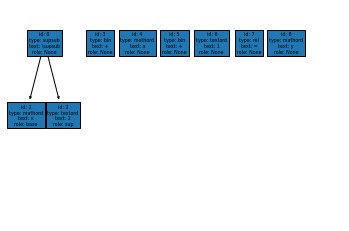

In [17]:
ForestPlotter().export(
    f.ast_graph, root_list=[node["val"]["id"] for node in f.ast if node["structure"]["father"] is None],
)
plt.show()

## 变量标准化

下面这个例子中，`var` 为变量编号。同一变量拥有相同的变量编号。  
如：`x` 变量的编号为 `0`， `y` 变量的编号为 `1`。

In [20]:
f.variable_standardization().elements

[{'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None},
 {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base', 'var': 0},
 {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'},
 {'id': 3, 'type': 'bin', 'text': '+', 'role': None},
 {'id': 4, 'type': 'mathord', 'text': 'x', 'role': None, 'var': 0},
 {'id': 5, 'type': 'bin', 'text': '+', 'role': None},
 {'id': 6, 'type': 'textord', 'text': '1', 'role': None},
 {'id': 7, 'type': 'rel', 'text': '=', 'role': None},
 {'id': 8, 'type': 'mathord', 'text': 'y', 'role': None, 'var': 1}]

## 方程组结构解析

调用 `FormulaGroup` 类解析公式方程组，相关的属性和函数方法同上。

In [21]:
fs = FormulaGroup([
    "x^2 = y",
    "x^3 = y^2",
    "x + y = \pi"
])
fs

<FormulaGroup: <Formula: x^2 = y>;<Formula: x^3 = y^2>;<Formula: x + y = \pi>>

In [22]:
fs.elements

[{'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None},
 {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base'},
 {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'},
 {'id': 3, 'type': 'rel', 'text': '=', 'role': None},
 {'id': 4, 'type': 'mathord', 'text': 'y', 'role': None},
 {'id': 5, 'type': 'supsub', 'text': '\\supsub', 'role': None},
 {'id': 6, 'type': 'mathord', 'text': 'x', 'role': 'base'},
 {'id': 7, 'type': 'textord', 'text': '3', 'role': 'sup'},
 {'id': 8, 'type': 'rel', 'text': '=', 'role': None},
 {'id': 9, 'type': 'supsub', 'text': '\\supsub', 'role': None},
 {'id': 10, 'type': 'mathord', 'text': 'y', 'role': 'base'},
 {'id': 11, 'type': 'textord', 'text': '2', 'role': 'sup'},
 {'id': 12, 'type': 'mathord', 'text': 'x', 'role': None},
 {'id': 13, 'type': 'bin', 'text': '+', 'role': None},
 {'id': 14, 'type': 'mathord', 'text': 'y', 'role': None},
 {'id': 15, 'type': 'rel', 'text': '=', 'role': None},
 {'id': 16, 'type': 'mathord', 'text': '\\pi', 'role': 

In [23]:
fs.ast

[{'val': {'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None},
  'structure': {'bro': [None, 3],
   'child': [1, 2],
   'father': None,
   'forest': None}},
 {'val': {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base'},
  'structure': {'bro': [None, 2],
   'child': None,
   'father': 0,
   'forest': [6, 12]}},
 {'val': {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'},
  'structure': {'bro': [1, None], 'child': None, 'father': 0, 'forest': None}},
 {'val': {'id': 3, 'type': 'rel', 'text': '=', 'role': None},
  'structure': {'bro': [0, 4], 'child': None, 'father': None, 'forest': None}},
 {'val': {'id': 4, 'type': 'mathord', 'text': 'y', 'role': None},
  'structure': {'bro': [3, None],
   'child': None,
   'father': None,
   'forest': [10, 14]}},
 {'val': {'id': 5, 'type': 'supsub', 'text': '\\supsub', 'role': None},
  'structure': {'bro': [None, 8],
   'child': [6, 7],
   'father': None,
   'forest': None}},
 {'val': {'id': 6, 'type': 'mathord', 'text': 'x', 'role'

[Text(22.32, 181.2, 'id: 0\ntype: supsub\ntext: \\supsub\nrole: None'),
 Text(11.16, 108.72, 'id: 1\ntype: mathord\ntext: x\nrole: base'),
 Text(33.480000000000004, 108.72, 'id: 2\ntype: textord\ntext: 2\nrole: sup'),
 Text(55.8, 181.2, 'id: 3\ntype: rel\ntext: =\nrole: None'),
 Text(78.12, 181.2, 'id: 4\ntype: mathord\ntext: y\nrole: None'),
 Text(111.6, 181.2, 'id: 5\ntype: supsub\ntext: \\supsub\nrole: None'),
 Text(100.44, 108.72, 'id: 6\ntype: mathord\ntext: x\nrole: base'),
 Text(122.76, 108.72, 'id: 7\ntype: textord\ntext: 3\nrole: sup'),
 Text(145.08, 181.2, 'id: 8\ntype: rel\ntext: =\nrole: None'),
 Text(178.56, 181.2, 'id: 9\ntype: supsub\ntext: \\supsub\nrole: None'),
 Text(167.4, 108.72, 'id: 10\ntype: mathord\ntext: y\nrole: base'),
 Text(189.72, 108.72, 'id: 11\ntype: textord\ntext: 2\nrole: sup'),
 Text(212.04, 181.2, 'id: 12\ntype: mathord\ntext: x\nrole: None'),
 Text(234.36, 181.2, 'id: 13\ntype: bin\ntext: +\nrole: None'),
 Text(256.68, 181.2, 'id: 14\ntype: mathord\

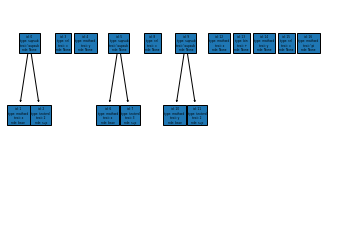

In [25]:
ForestPlotter().export(
    fs.ast_graph, root_list=[node["val"]["id"] for node in fs.ast if node["structure"]["father"] is None],
)

In [28]:
for ft in fs.variable_standardization():
    print(ft.elements)

[{'id': 0, 'type': 'supsub', 'text': '\\supsub', 'role': None}, {'id': 1, 'type': 'mathord', 'text': 'x', 'role': 'base', 'var': 0}, {'id': 2, 'type': 'textord', 'text': '2', 'role': 'sup'}, {'id': 3, 'type': 'rel', 'text': '=', 'role': None}, {'id': 4, 'type': 'mathord', 'text': 'y', 'role': None, 'var': 1}]
[{'id': 5, 'type': 'supsub', 'text': '\\supsub', 'role': None}, {'id': 6, 'type': 'mathord', 'text': 'x', 'role': 'base', 'var': 0}, {'id': 7, 'type': 'textord', 'text': '3', 'role': 'sup'}, {'id': 8, 'type': 'rel', 'text': '=', 'role': None}, {'id': 9, 'type': 'supsub', 'text': '\\supsub', 'role': None}, {'id': 10, 'type': 'mathord', 'text': 'y', 'role': 'base', 'var': 1}, {'id': 11, 'type': 'textord', 'text': '2', 'role': 'sup'}]
[{'id': 12, 'type': 'mathord', 'text': 'x', 'role': None, 'var': 0}, {'id': 13, 'type': 'bin', 'text': '+', 'role': None}, {'id': 14, 'type': 'mathord', 'text': 'y', 'role': None, 'var': 1}, {'id': 15, 'type': 'rel', 'text': '=', 'role': None}, {'id': 1